## Prep

In [1]:
import csv
import time
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import (
    Dense, Conv1D, MaxPooling1D, 
    BatchNormalization, Dropout, Flatten
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
 


## Read Data

In [2]:
alphabet_labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", 
                   "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y", "z"]

feature_data = []
label_data = []

data_directory = 'extracted_features_data'

for letter in alphabet_labels:
    file_path = f'{data_directory}/{letter}.csv'
    letter_data = pd.read_csv(file_path, header=None)
    label_index = alphabet_labels.index(letter)
    
    for row in letter_data.values:
        feature_data.append(row)
        label_data.append(label_index)

X = feature_data
y = label_data

X_train, X_test, y_train, y_test = train_test_split(
    np.array(X).reshape(-1, 63, 1), 
    y, 
    test_size=0.1
)
y_train_categorical = to_categorical(y_train)



## Model A

In [3]:
model_a = Sequential()

model_a.add(Conv1D(filters=64, kernel_size=3, strides=1, activation='relu'))
model_a.add(Conv1D(filters=32, kernel_size=3, strides=1, activation='relu'))
model_a.add(BatchNormalization())
model_a.add(MaxPooling1D(pool_size=2))

model_a.add(Flatten())
model_a.add(Dense(units=128, activation='relu'))
model_a.add(Dense(units=26, activation='softmax'))

model_a.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [14]:
training_history_a = model_a.fit(
    X_train, 
    y_train_categorical, 
    epochs=10, 
    batch_size=64, 
    validation_split=0.1
)

y_test_categorical = to_categorical(y_test)

evaluation_metrics = model_a.evaluate(X_test, y_test_categorical)

model_a.summary()

print(evaluation_metrics)

model_a.save('model_a.h5')
print("Model A saved as 'model_a.h5'")

Epoch 1/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9922 - loss: 0.0240 - val_accuracy: 0.9922 - val_loss: 0.0349
Epoch 2/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0224 - val_accuracy: 0.9897 - val_loss: 0.0412
Epoch 3/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9935 - loss: 0.0200 - val_accuracy: 0.9926 - val_loss: 0.0353
Epoch 4/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9936 - loss: 0.0199 - val_accuracy: 0.9873 - val_loss: 0.0562
Epoch 5/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9945 - loss: 0.0179 - val_accuracy: 0.9927 - val_loss: 0.0357
Epoch 6/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9945 - loss: 0.0175 - val_accuracy: 0.9927 - val_loss: 0.0354
Epoch 7/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0.9893 - val_loss: 0.0463
Epoch 8/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9954 - loss: 0.0147 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 61, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 59, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 59, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 928)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       118,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 386,352 (1.47 MB)

 Trainable params: 128,762 (502.98 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 257,526 (1005.96 KB)

[0.04947264865040779, 0.989388108253479]
Model A saved as 'model_a.h5'


## Model B

In [5]:
model_b = Sequential()

model_b.add(Conv1D(filters=48, kernel_size=4, strides=1, activation='relu'))
model_b.add(Conv1D(filters=32, kernel_size=3, strides=1, activation='relu'))
model_b.add(BatchNormalization())
model_b.add(MaxPooling1D(pool_size=2))

model_b.add(Flatten())
model_b.add(Dense(units=96, activation='relu'))
model_b.add(Dropout(0.2))
model_b.add(Dense(units=26, activation='softmax'))

model_b.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [ ]:
training_history_b = model_b.fit(
    X_train, 
    y_train_categorical, 
    epochs=10, 
    batch_size=64, 
    validation_split=0.1
)

y_test_categorical = to_categorical(y_test)

evaluation_metrics = model_b.evaluate(X_test, y_test_categorical)

model_b.summary()

print(evaluation_metrics)

model_b.save('model_b.h5')
print("Model B saved as 'model_b.h5'")

Epoch 1/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9053 - loss: 0.3438 - val_accuracy: 0.9703 - val_loss: 0.1061
Epoch 2/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9698 - loss: 0.1123 - val_accuracy: 0.9809 - val_loss: 0.0693
Epoch 3/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9752 - loss: 0.0870 - val_accuracy: 0.9836 - val_loss: 0.0595
Epoch 4/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9793 - loss: 0.0728 - val_accuracy: 0.9855 - val_loss: 0.0520
Epoch 5/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0634 - val_accuracy: 0.9868 - val_loss: 0.0496
Epoch 6/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0561 - val_accuracy: 0.9901 - val_loss: 0.0408
Epoch 7/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9849 - loss: 0.0504 - val_accuracy: 0.9906 - val_loss: 0.0376
Epoch 8/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9852 - loss: 0.0474 - 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 60, 48)         │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 58, 32)         │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 58, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 928)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 96)             │        89,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 26)             │         2,522 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 290,016 (1.11 MB)

 Trainable params: 96,650 (377.54 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 193,302 (755.09 KB)

[0.04393686726689339, 0.9886990189552307]


## Model C

In [7]:
model_c = Sequential()

model_c.add(Conv1D(filters=48, kernel_size=4, strides=1, activation='relu'))
model_c.add(Conv1D(filters=32, kernel_size=3, strides=1, activation='relu'))
model_c.add(BatchNormalization())
model_c.add(MaxPooling1D(pool_size=3))

model_c.add(Conv1D(filters=24, kernel_size=3, strides=1, activation='relu'))
model_c.add(Conv1D(filters=16, kernel_size=3, strides=1, activation='relu'))
model_c.add(BatchNormalization())
model_c.add(MaxPooling1D(pool_size=2))

model_c.add(Flatten())
model_c.add(Dense(units=96, activation='relu'))
model_c.add(Dropout(0.15))
model_c.add(Dense(units=26, activation='softmax'))

model_c.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)


In [ ]:
training_history_c = model_c.fit(
    X_train, 
    y_train_categorical, 
    epochs=10, 
    batch_size=64, 
    validation_split=0.1
)

y_test_categorical = to_categorical(y_test)

evaluation_metrics = model_c.evaluate(X_test, y_test_categorical)

model_c.summary()

print(evaluation_metrics)

model_c.save('model_c.h5')
print("Model C saved as 'model_c.h5'")

Epoch 1/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9077 - loss: 0.3382 - val_accuracy: 0.9713 - val_loss: 0.1080
Epoch 2/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9698 - loss: 0.1090 - val_accuracy: 0.9775 - val_loss: 0.0821
Epoch 3/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9768 - loss: 0.0847 - val_accuracy: 0.9779 - val_loss: 0.0790
Epoch 4/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9803 - loss: 0.0717 - val_accuracy: 0.9834 - val_loss: 0.0618
Epoch 5/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9820 - loss: 0.0636 - val_accuracy: 0.9790 - val_loss: 0.0777
Epoch 6/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9836 - loss: 0.0573 - val_accuracy: 0.9814 - val_loss: 0.0647
Epoch 7/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0529 - val_accuracy: 0.9834 - val_loss: 0.0561
Epoch 8/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0489 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 60, 48)         │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 58, 32)         │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 58, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 17, 24)         │         2,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 15, 16)         │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 7, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │        10,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         2,522 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,624 (256.35 KB)

 Trainable params: 21,842 (85.32 KB)

 Non-trainable params: 96 (384.00 B)

 Optimizer params: 43,686 (170.65 KB)

[0.0445975698530674, 0.9880099296569824]


In [9]:
#model.save("disease_model_.h5")

## Model D

In [10]:
model_d = Sequential()

model_d.add(Dense(units=128, activation='relu'))
model_d.add(Dropout(0.2))
model_d.add(Dense(units=64, activation='relu'))
model_d.add(Dropout(0.15))
model_d.add(Dense(units=26, activation='softmax'))

model_d.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [ ]:
X_train_flat = X_train.reshape(-1, 63)
X_test_flat = X_test.reshape(-1, 63)

training_history_d = model_d.fit(
    X_train_flat, 
    y_train_categorical, 
    epochs=10, 
    batch_size=64, 
    validation_split=0.1
)

y_test_categorical = to_categorical(y_test)

evaluation_metrics = model_d.evaluate(X_test_flat, y_test_categorical)

model_d.summary()

print(evaluation_metrics)

model_d.save('model_d.h5')
print("Model D saved as 'model_d.h5'")

Epoch 1/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.6749 - loss: 1.1327 - val_accuracy: 0.9017 - val_loss: 0.4171
Epoch 2/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.8779 - loss: 0.4303 - val_accuracy: 0.9245 - val_loss: 0.2740
Epoch 3/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9105 - loss: 0.3168 - val_accuracy: 0.9354 - val_loss: 0.2251
Epoch 4/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9253 - loss: 0.2671 - val_accuracy: 0.9509 - val_loss: 0.1836
Epoch 5/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.9343 - loss: 0.2337 - val_accuracy: 0.9587 - val_loss: 0.1527
Epoch 6/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9399 - loss: 0.2151 - val_accuracy: 0.9600 - val_loss: 0.1522
Epoch 7/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - accuracy: 0.9441 - loss: 0.1968 - val_accuracy: 0.9680 - val_loss: 0.1200
Epoch 8/10
1837/1837 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.9475 -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,416 (212.57 KB)

 Trainable params: 18,138 (70.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36,278 (141.71 KB)

[0.11159884184598923, 0.9698870182037354]


## Result Graphing

In [12]:
total_inference_time = 0
num_iterations = 1

for iteration in range(num_iterations):
    start = time.time()
    model_d.predict(X_test_flat)
    single_pred_time = time.time() - start

    start = time.time()
    model_d.predict(X_test_flat)
    model_d.predict(X_test_flat)
    double_pred_time = time.time() - start

    total_inference_time += (double_pred_time - single_pred_time)

average_inference_time = total_inference_time / num_iterations
print(average_inference_time)




454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step
454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 194us/step
0.09501385688781738


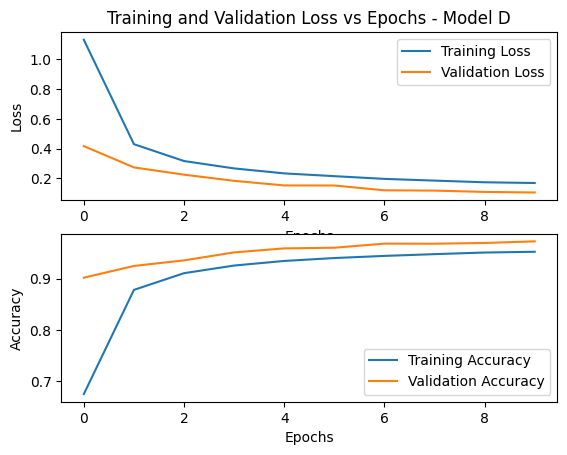

454/454 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step


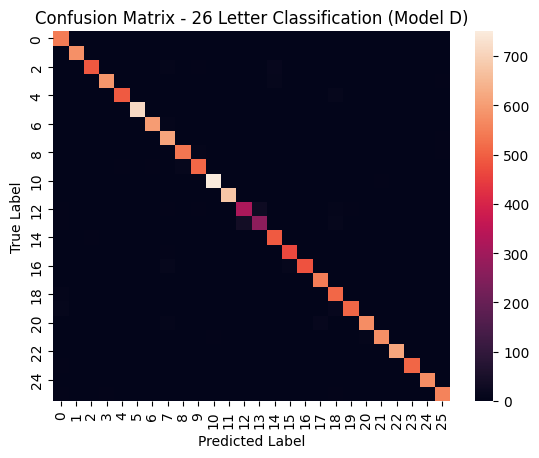

In [13]:
plt.subplot(2, 1, 1)
plt.title("Training and Validation Loss vs Epochs - Model D")
plt.plot(training_history_d.history["loss"])
plt.plot(training_history_d.history["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(2, 1, 2)
plt.plot(training_history_d.history["accuracy"])
plt.plot(training_history_d.history["val_accuracy"])
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

y_predictions = model_d.predict(X_test_flat)
y_predicted_labels = [np.argmax(prediction) for prediction in y_predictions]

confusion_matrix_result = confusion_matrix(y_test, y_predicted_labels)

seaborn.heatmap(confusion_matrix_result)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - 26 Letter Classification (Model D)")
plt.show()